## **Data Cleaning Module**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import joblib
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer,ToktokTokenizer
import re
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score
from numpy import nan
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df = pd.read_csv('/content/training_data_2_csv_UTF.csv')

## **Data Cleaning**

In [ ]:
df['bot'].value_counts()

0    1476
1    1321
Name: bot, dtype: int64

In [ ]:
df['url']=df['url'].notna()

### **Removing Irrelevant columns**

In [ ]:
df=df.drop(['id', 'id_str', 'screen_name', 'location','lang', 'status','name','created_at'], axis = 1)

### **Handing missing values**

In [ ]:
Null=[]
for i in df:
 Null.append((i,df[i].isna().mean()*100))
Null=pd.DataFrame(Null,columns=['class','Null Value %'])
Null

,class,Null Value %
0,description,14.408295
1,url,0.000000
2,followers_count,0.000000
3,friends_count,0.000000
4,listed_count,0.000000
5,favourites_count,0.000000
6,verified,0.000000
7,statuses_count,0.000000
8,default_profile,0.000000
9,default_profile_image,0.000000


In [ ]:
df=df.dropna()

### **Changing features to integer data type**

In [ ]:
df["url"] = df["url"].astype(int)
df["verified"] = df["verified"].astype(int)
df["default_profile"] = df["default_profile"].astype(int)
df["default_profile_image"] = df["default_profile_image"].astype(int)
df["has_extended_profile"] = df["has_extended_profile"].astype(int)

In [ ]:
df

,description,url,followers_count,friends_count,listed_count,favourites_count,verified,statuses_count,default_profile,default_profile_image,has_extended_profile,bot
0,"""Rare and strong PokŽmon in Houston, TX. See m...",1,1291,0,10,0,0,78554,1,0,0,1
1,From late 2014 Socium Marketplace will make sh...,0,1,349,0,38,0,31,1,0,0,1
2,"Inspired by the smart, funny folks at @replyal...",1,1086,0,14,0,0,713,1,0,0,1
4,Inspiring cooks everywhere since 1956.,0,11,745,0,146,0,185,0,0,0,1
5,Just a guy trying to do good by telling everyo...,0,1,186,0,0,0,11,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2792,"Twitter CMO. Favorite title: Mama. Never, ever...",0,18998,2005,425,2503,0,3498,0,0,1,0
2793,"I live in brooklyn, I'm a bike messenger, I pl...",1,32,54,0,1,0,97,1,0,0,0
2794,astrophysicist,1,45044433,7451,68157,24,1,9606,0,0,0,0
2795,"I'm quite out of my mind, actually, but people...",0,16,64,1,15,0,62,0,0,1,0


## **Data Analysis**

### **Checking for imbalanced classes**

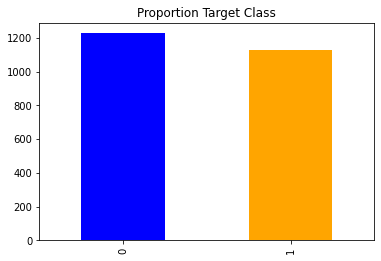

In [ ]:
count_class=pd.value_counts(df["bot"], sort= True)
count_class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Proportion Target Class')
plt.show()

### **Heatmap**

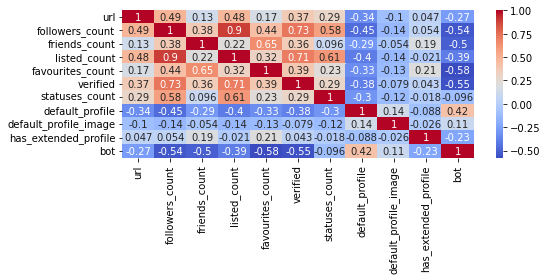

In [ ]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(method='spearman'), cmap='coolwarm', annot=True)
plt.tight_layout()
plt.show()

In [ ]:
abs(df.corr()['bot']).sort_values(ascending=False)

bot                      1.000000
verified                 0.553911
default_profile          0.421842
url                      0.269588
has_extended_profile     0.230736
listed_count             0.176093
followers_count          0.175378
default_profile_image    0.106334
favourites_count         0.087197
statuses_count           0.062538
friends_count            0.058970
Name: bot, dtype: float64

### **Removing columns based on collinearity**

In [ ]:
df=df.drop(['favourites_count','statuses_count','friends_count'], axis = 1)

### **Word Cloud**

**Bot Accounts**

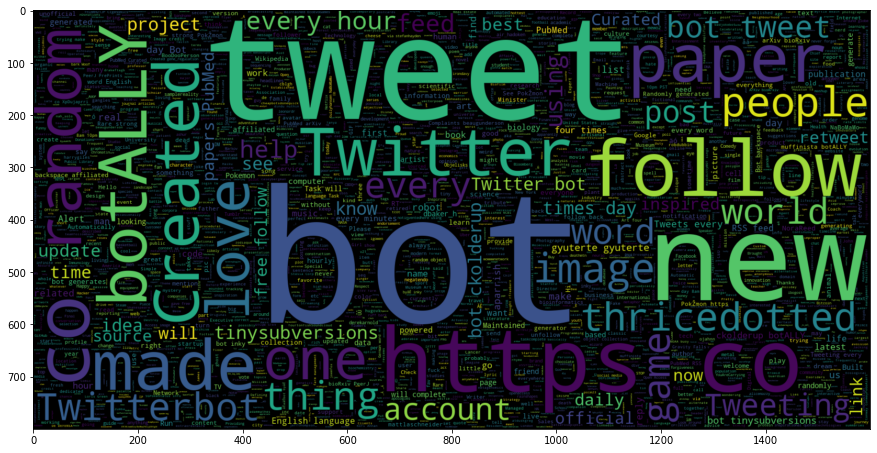

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize = (15,15))
wc = WordCloud(width = 1600 , height = 800 , max_words = 3000).generate(" ".join(df[df.bot == 1].description))
plt.imshow(wc , interpolation = 'bilinear')

**Normal Accounts**

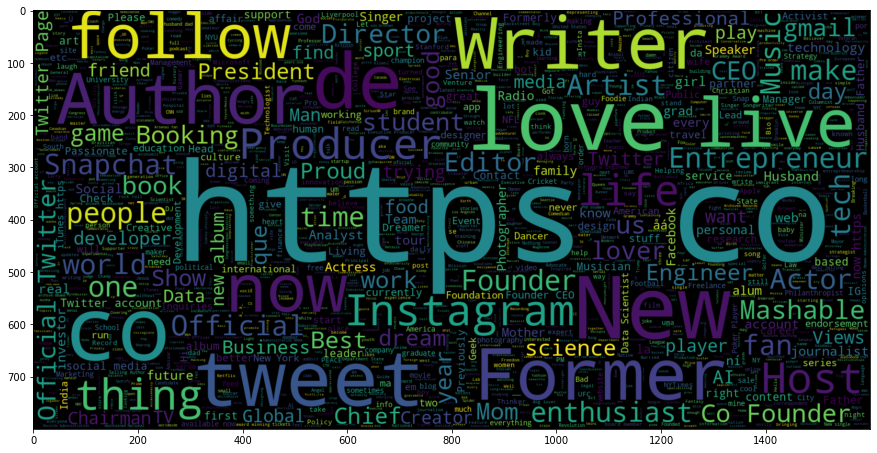

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize = (15,15))
wc = WordCloud(width = 1600 , height = 800 , max_words = 3000).generate(" ".join(df[df.bot == 0].description))
plt.imshow(wc , interpolation = 'bilinear')

**PairPlot**

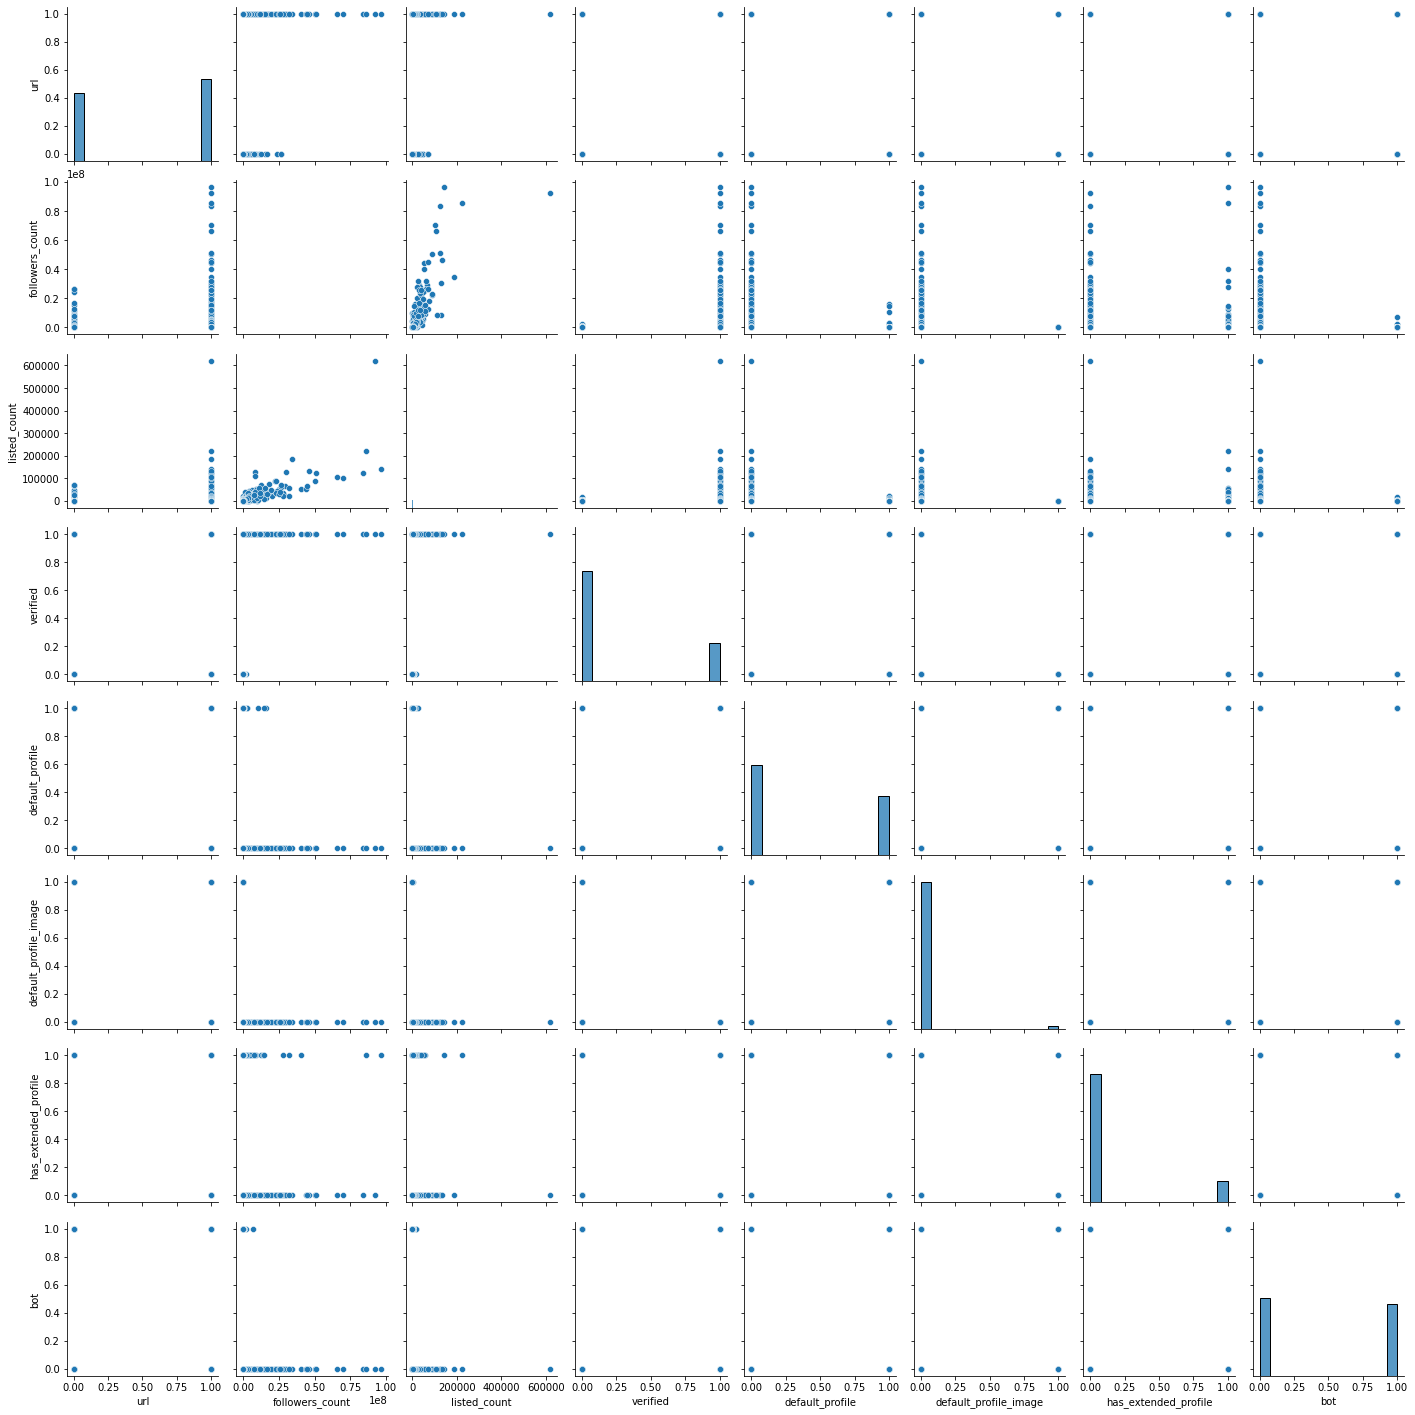

In [ ]:
import seaborn as sns
sns.pairplot(df)

## **Data Pre-Processing**

In [ ]:
print(df['description'][2784])

"Photographer specializing in garden and landscape photography and Canon Camera classes."


In [ ]:
def to_lower(text):
    return ' '.join([w.lower() for w in word_tokenize(text)])

df['description'] = df['description'].apply(to_lower)
print(df['description'][2784])

`` photographer specializing in garden and landscape photography and canon camera classes . ''


In [ ]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')

df['description'] = df['description'].apply(lambda x: tokenizer.tokenize(x))
print(df['description'][2784])

['photographer', 'specializing', 'in', 'garden', 'and', 'landscape', 'photography', 'and', 'canon', 'camera', 'classes']


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopword_list=nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    words = [w for w in text if w not in stopword_list]
    return words

df['description'] = df['description'].apply(lambda x : remove_stopwords(x))
print(df['description'][2784])

['photographer', 'specializing', 'garden', 'landscape', 'photography', 'canon', 'camera', 'classes']


In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from nltk.stem.snowball import SnowballStemmer
st = SnowballStemmer("english")
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return text

df['description'] = df['description'].apply(lambda x: stemming_on_text(x))
df['description'][2784]

['photograph',
 'special',
 'garden',
 'landscap',
 'photographi',
 'canon',
 'camera',
 'class']

In [ ]:
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ' '.join(list_text_new)
df['description'] = df['description'].apply(lambda x: drop_numbers(x))
df['description'][2784]


'photograph special garden landscap photographi canon camera class'

In [ ]:
df

,description,url,followers_count,friends_count,listed_count,favourites_count,verified,statuses_count,default_profile,default_profile_image,has_extended_profile,bot
0,rare strong pokžmon houston tx see pokžmon htt...,1,1291,0,10,0,0,78554,1,0,0,1
1,late socium marketplac make shop fundament bus...,0,1,349,0,38,0,31,1,0,0,1
2,inspir smart funni folk replyal gimletmedia _ñ...,1,1086,0,14,0,0,713,1,0,0,1
4,inspir cook everywher sinc,0,11,745,0,146,0,185,0,0,0,1
5,guy tri good tell everyon els get better,0,1,186,0,0,0,11,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2792,twitter cmo favorit titl mama never ever dull ...,0,18998,2005,425,2503,0,3498,0,0,1,0
2793,live brooklyn bike messeng play band uniqu exa...,1,32,54,0,1,0,97,1,0,0,0
2794,astrophysicist,1,45044433,7451,68157,24,1,9606,0,0,0,0
2795,quit mind actual peopl continu find amus ca n ...,0,16,64,1,15,0,62,0,0,1,0


## **Model**

In [ ]:
df=df.dropna()

In [ ]:
y=df['bot']
x=df.drop(['bot'], axis = 1)


### **Spltting dataset**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class TextSelector(BaseEstimator, TransformerMixin):


    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.key]
class NumberSelector(BaseEstimator, TransformerMixin):

    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2355 entries, 0 to 2796
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   description            2355 non-null   object
 1   url                    2355 non-null   int64 
 2   followers_count        2355 non-null   int64 
 3   friends_count          2355 non-null   int64 
 4   listed_count           2355 non-null   int64 
 5   favourites_count       2355 non-null   int64 
 6   verified               2355 non-null   int64 
 7   statuses_count         2355 non-null   int64 
 8   default_profile        2355 non-null   int64 
 9   default_profile_image  2355 non-null   int64 
 10  has_extended_profile   2355 non-null   int64 
 11  bot                    2355 non-null   int64 
dtypes: int64(11), object(1)
memory usage: 239.2+ KB


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler


Desc = Pipeline([
                ('selector', TextSelector(key='description')),
                ('tfidf', TfidfVectorizer( stop_words='english'))
            ])
url =  Pipeline([
                ('selector', NumberSelector(key='url')),
                ('standard', StandardScaler())
            ])

followers_count =  Pipeline([
                ('selector', NumberSelector(key='followers_count')),
                ('standard', StandardScaler())
            ])
listed_count =  Pipeline([
                ('selector', NumberSelector(key='listed_count')),
                ('standard', StandardScaler())
            ])
default_profile =  Pipeline([
                ('selector', NumberSelector(key='default_profile')),
                ('standard', StandardScaler())
            ])
default_profile_image =  Pipeline([
                ('selector', NumberSelector(key='default_profile_image')),
                ('standard', StandardScaler())
            ])
has_extended_profile =  Pipeline([
                ('selector', NumberSelector(key='has_extended_profile')),
                ('standard', StandardScaler())
            ])

In [ ]:
from sklearn.pipeline import FeatureUnion
feats = FeatureUnion([('Desc',Desc),
                      ('url',url),
                      ('followers_count',followers_count),
                      ('listed_count',listed_count),
                      ('default_profile',default_profile),
                      ('default_profile_image',default_profile_image),
                      ('has_extended_profile',has_extended_profile)
                ])
feature_processing = Pipeline([('feats', feats)])
feature_processing.fit_transform(X_train)

<2119x6414 sparse matrix of type '<class 'numpy.float64'>'
	with 29647 stored elements in Compressed Sparse Row format>

### **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('features',feats),
    ('classifier', RandomForestClassifier(random_state = 42)),
])

model=pipeline.fit(X_train, y_train)

NameError: ignored

In [ ]:
y_pred=model.predict(X_test)
y_pred_proba=model.predict_proba(X_test)

In [ ]:
print("Accuracy:",accuracy_score(y_test, y_pred))
print("F1 score:",f1_score(y_test, y_pred, average="macro"))
print("Precision_score:",precision_score(y_test, y_pred, average="macro"))
print("Recall_score:",recall_score(y_test, y_pred, average="macro"))

Accuracy: 0.885593220338983
F1 score: 0.884496166186307
Precision_score: 0.8875465362435214
Recall_score: 0.8830447330447331


[[116  10]
 [ 17  93]]


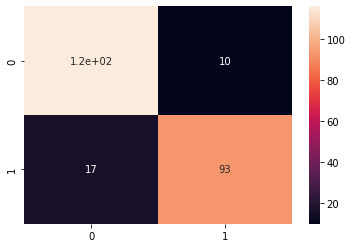

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True)

### **Logisitc Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('features',feats),
    ('classifier', LogisticRegression(random_state = 42)),
])

model=pipeline.fit(X_train, y_train)

In [ ]:
y_pred=model.predict(X_test)
y_pred_proba=model.predict_proba(X_test)

In [ ]:
print("Accuracy:",accuracy_score(y_test, y_pred))
print("F1 score:",f1_score(y_test, y_pred, average="macro"))
print("Precision_score:",precision_score(y_test, y_pred, average="macro"))
print("Recall_score:",recall_score(y_test, y_pred, average="macro"))

Accuracy: 0.847457627118644
F1 score: 0.8465650509282671
Precision_score: 0.8470775462962963
Recall_score: 0.8461760461760461


[[109  17]
 [ 19  91]]


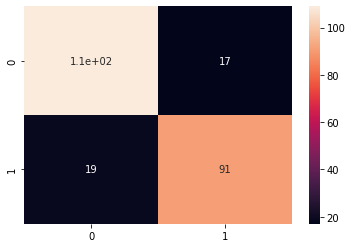

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True)

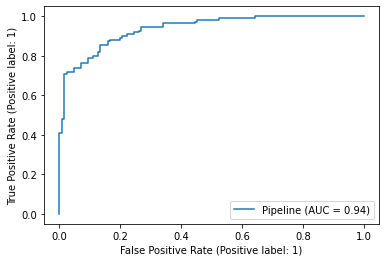

In [ ]:
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()

### **Grid Search CV**

In [ ]:
from sklearn.model_selection import GridSearchCV
hyperparameters = { 'features__Desc__tfidf__max_df': [0.2,0.3,0.4],
                    'features__Desc__tfidf__ngram_range': [(1,2),(1,3)],
                   'classifier__max_depth': [140,160,200],
                    'classifier__min_samples_leaf': [0.5,1,2],

                  }
pipeline = Pipeline([
    ('features',feats),
    ('classifier', RandomForestClassifier(random_state = 42)),
])
clf = GridSearchCV(pipeline, hyperparameters, cv=4)

# Fit and tune model
clf.fit(X_train, y_train.round())

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('features',
                                        FeatureUnion(transformer_list=[('Desc',
                                                                        Pipeline(steps=[('selector',
                                                                                         TextSelector(key='description')),
                                                                                        ('tfidf',
                                                                                         TfidfVectorizer(stop_words='english'))])),
                                                                       ('url',
                                                                        Pipeline(steps=[('selector',
                                                                                         NumberSelector(key='url')),
                                                                                        ('standard

In [ ]:
clf.best_params_

{'classifier__max_depth': 120,
 'classifier__min_samples_leaf': 1,
 'features__Desc__tfidf__max_df': 0.2,
 'features__Desc__tfidf__ngram_range': (1, 2)}

In [ ]:
clf.refit
y_pred=clf.predict(X_test)
y_pred_proba=clf.predict_proba(X_test)

In [ ]:
print("Accuracy:",accuracy_score(y_test, y_pred))
print("F1 score:",f1_score(y_test, y_pred, average="macro"))
print("Precision_score:",precision_score(y_test, y_pred, average="macro"))
print("Recall_score:",recall_score(y_test, y_pred, average="macro"))

Accuracy: 0.8771186440677966
F1 score: 0.876316978404265
Precision_score: 0.8772368325726292
Recall_score: 0.8756854256854256


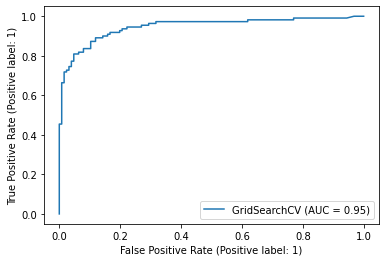

In [ ]:
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.show()

[[113  13]
 [ 16  94]]


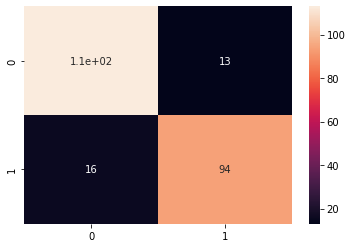

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True)

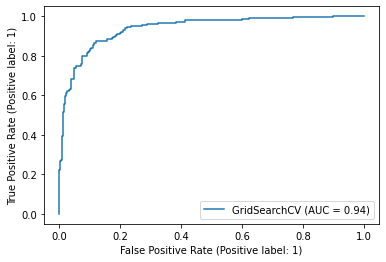

In [ ]:
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.show()

AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
pipeline = Pipeline([
    ('features',feats),
    ('classifier', AdaBoostClassifier(n_estimators=100, random_state=0)),
])


ad=pipeline.fit(X_train, y_train.round())

In [ ]:
y_pred=ad.predict(X_test)
y_pred_proba=ad.predict_proba(X_test)

In [ ]:
print("Accuracy:",accuracy_score(y_test, y_pred))
print("F1 score:",f1_score(y_test, y_pred, average="macro"))
print("Precision_score:",precision_score(y_test, y_pred, average="macro"))
print("Recall_score:",recall_score(y_test, y_pred, average="macro"))

Accuracy: 0.8389830508474576
F1 score: 0.8373004354136429
Precision_score: 0.840649692712906
Recall_score: 0.835930735930736


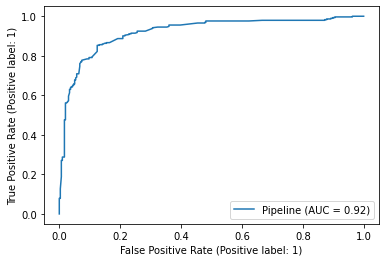

In [ ]:
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(ad, X_test, y_test)
plt.show()